In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def constraint1(x1):
    return (-1)*x1 + 1
def constraint2(x2):
    return (-1)*x2 + 1
def constraint3(x1, x2, a):
    return np.sqrt(x1**2 + x2**2) - a

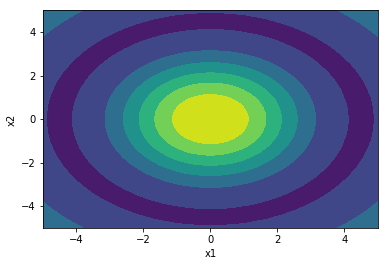

In [3]:
def function(x1, x2):
    return np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))
    
x1 = np.linspace(-5,5)
x2 = np.linspace(-5,5)

x1v, x2v = np.meshgrid(x1,x2)
z = function(x1v, x2v)
plt.contourf(x1v,x2v,z)
plt.xlabel('x1')
plt.ylabel('x2')

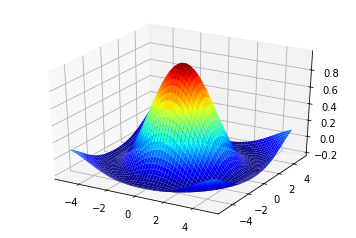

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
c1 = constraint1(x1v)
c2 = constraint2(x2v)
c3 = constraint3(x1v, x2v, 5)
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x1v,x2v,z, cmap=cm.jet)

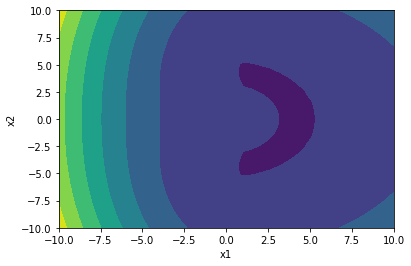

In [5]:
def constrained_function(x1, x2, c):
    return np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)) + \
            c*np.maximum(0, constraint1(x1))**2 + \
            c*np.maximum(0, constraint2(x1))**2 + \
            c*np.maximum(0, constraint3(x1,x2, 5))**2

x1 = np.linspace(-10,10)
x2 = np.linspace(-10,10)

x1v, x2v = np.meshgrid(x1,x2)

z = constrained_function(x1v, x2v, 1)
plt.contourf(x1v,x2v,z)
plt.xlabel('x1')
plt.ylabel('x2')

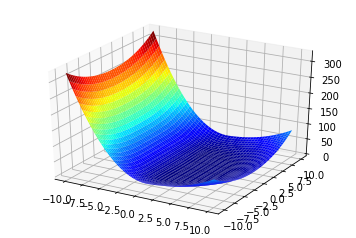

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x1v,x2v,z, cmap=cm.jet)

In [7]:
def create_new_base(direction, lam):
    new_base = np.zeros(direction.shape)
    D = direction.transpose()
    M = lam.transpose()
    Q = np.dot(D, M) #is really matrix multiplication for 2D arrays
    v = np.zeros(direction.shape)
    v[0] = Q[:,0] 
    #as in classical method, first vector is unchanged, only normalized
    new_base[0] = v[0]/np.sqrt(np.dot(v[0].transpose(), v[0]))
    for j in range(1, len(direction)):
        scalar_dir = np.zeros(len(Q[0,:]))
        for k in range(0, j): #here happens the summation of vectors
            p = np.dot(Q[:,j].transpose(), new_base[k, :])
            p = np.multiply(p, new_base[k, :])
            scalar_dir = np.add(scalar_dir,p)
        v[j] = np.subtract(Q[:,j] ,scalar_dir)
        new_base[j] = v[j]/np.sqrt(np.dot(v[j].transpose(), v[j]))
    return new_base

def rosenbrock_method(function, x0, direction, s, alpha, beta, N, verbose, c):
    #alpha - expansion coefficient
    #beta - contraction coefficient
    lam = [0 for i in range(len(direction))] #success list for each direction
    p = [0 for i in range(len(direction))] #failure list for each direction
    i = 0
    x_base = x0
    x_list = []
    while i <= N:
        if verbose: 
            print("ITERATION NUMBER : {}".format(i))
            print("CURRENT MINUMUM : {}".format(x_base))
        for j in range(len(direction)):
            if verbose:
                print("\nCurrent value {}".format(function(x_base, c)))
                print("Value of next_step {}".format(function\
                                                     (np.add(x_base,np.multiply\
                                                             (direction[j],s[j])), c)))
            if function(np.add(x_base,np.multiply(direction[j],s[j])),c) \
                < function(x_base, c):
                #successful step
                if verbose: print("\nSuccess")
                x_base = np.add(x_base,np.multiply(direction[j],s[j]))
                x_list.append(x_base)
                lam[j] = np.add(lam[j],s[j])
                s[j] = np.multiply(alpha,s[j])
            elif function(np.add(x_base,np.multiply(direction[j],s[j])), c) \
                >= function(x_base, c):
                if verbose: print("Failure\n")
                #failed step
                s[j] = (-1)*s[j]*beta
                p[j] = np.add(p[j],1)
            if verbose: print("State of success: {} \nState of failure: {} \nStep is: {}"\
                              .format(lam, p, s))
        for_all = 0
        if verbose: print("\nInvestigating failures and successes")
        for j in range(len(direction)):
            if verbose: print("Failure [{}] : {}, Success[{}] : {}"\
                              .format(j, p[j], j, lam[j]))
            if p[j] !=0 and lam[j]!=0:
                for_all += 1
        if verbose: print("Directions for which there was a success and a failure : {}"\
                          .format(for_all))
        if for_all == len(direction):
            if verbose: print("Change of base\n")
            l = np.zeros((2,2))
            l[0,0] = lam[0]
            l[1,0] = lam[1]
            l[1,1] = lam[1]
            if verbose: print("Triangular matrix: \n{}".format(l))
            direction = create_new_base(direction, l.transpose())  
            if verbose: print("New base is {}\n".format(direction))
            lam = [0 for i in range(len(direction))] #clear
            p = [0 for i in range(len(direction))] #clear
        i = i+1
        if verbose: print("####################################################")
    return x_base, x_list

In [8]:
def target_function(x, c):
    x1 = x[0]
    x2 = x[1]
    return np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)) + \
            c*np.maximum(0, constraint1(x1))**2 + \
            c*np.maximum(0, constraint2(x1))**2 + \
            c*np.maximum(0, constraint3(x1,x2, 5.0))**2    

In [9]:
def optimization_with_constraints(function, x0, direction, s, alpha, beta, N, \
                                  verbose, N2, error):
    j = 0
    x_min = np.array([0.0,0.0])
    x_min[0] = 2*np.random.random() - 1
    x_min[1] = 2*np.random.random() - 1
    c = 0.5
    while j<N2:
        c = 2*c
        minimum, _ = rosenbrock_method(function, x0, direction, s, alpha, \
                                       beta, N, verbose, c)
        if np.sqrt((x_min[0]-minimum[0])**2 + (x_min[1]-minimum[1])**2) < error:    
            x_min[0] = minimum[0]
            x_min[1] = minimum[1]
            return x_min
        else:
            j += 1
            x_min[0] = minimum[0]
            x_min[1] = minimum[1]
    return x_min    

In [10]:
x_init = 100*np.random.random((100,2))-50 #draw x's in the specified interval
s = np.array([0.1,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minima = []
for xpair in x_init:
    p = optimization_with_constraints(target_function, xpair, direction, \
                                      s, 3, 0.5, 30, 0, 100, 1e-3)
    minima.append(p)

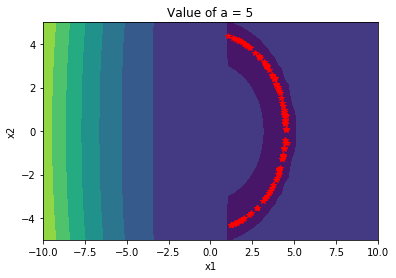

In [11]:
x1 = np.linspace(-10,10)
x2 = np.linspace(-5,5)
x1v, x2v = np.meshgrid(x1, x2)
z = constrained_function(x1v, x2v, 5)
plt.contourf(x1v,x2v,z)
x1s = [point[0] for point in minima]
x2s = [point[1] for point in minima]

plt.plot(x1s, x2s, 'r*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Value of a = 5')

In [12]:
def target_function(x, c):
    x1 = x[0]
    x2 = x[1]
    return np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)) + \
            c*np.maximum(0, constraint1(x1))**2 + \
            c*np.maximum(0, constraint2(x1))**2 + \
            c*np.maximum(0, constraint3(x1,x2, 4.4934))**2    

In [13]:
x_init = 100*np.random.random((100,2))-50 #draw x's in the specified interval
s = np.array([0.1,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minima_2 = []
for xpair in x_init:
    p = optimization_with_constraints(target_function, xpair, direction, s, \
                                      3, 0.5, 30, 0, 100, 1e-3)
    minima_2.append(p)

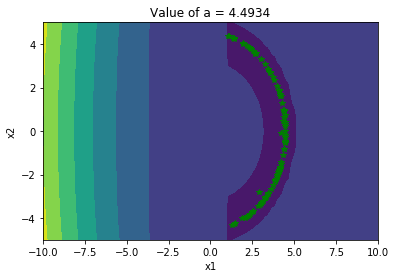

In [14]:
x1 = np.linspace(-10,10)
x2 = np.linspace(-5,5)
x1v, x2v = np.meshgrid(x1, x2)
z = constrained_function(x1v, x2v, 4.4934)
plt.contourf(x1v,x2v,z)
x1s_2 = [point[0] for point in minima_2]
x2s_2 = [point[1] for point in minima_2]
plt.plot(x1s_2, x2s_2, 'g*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Value of a = 4.4934')

In [15]:
def target_function(x, c):
    x1 = x[0]
    x2 = x[1]
    return np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)) + \
            c*np.maximum(0, constraint1(x1))**2 + \
            c*np.maximum(0, constraint2(x1))**2 + \
            c*np.maximum(0, constraint3(x1,x2, 4.0))**2    

In [16]:
x_init = 100*np.random.random((100,2))-50 #draw x's in the specified interval
s = np.array([0.1,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minima_3 = []
for xpair in x_init:
    p = optimization_with_constraints(target_function, xpair, direction, s, \
                                      3, 0.5, 30, 0, 100, 1e-3)
    minima_3.append(p)

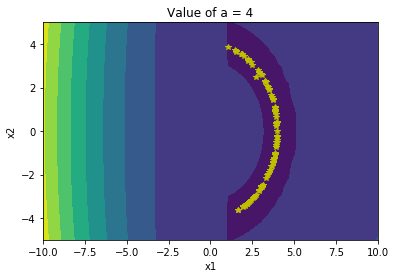

In [17]:
x1 = np.linspace(-10,10)
x2 = np.linspace(-5,5)
x1v, x2v = np.meshgrid(x1, x2)
z = constrained_function(x1v, x2v, 4)
plt.contourf(x1v,x2v,z)
x1s_3 = [point[0] for point in minima_3]
x2s_3 = [point[1] for point in minima_3]
plt.plot(x1s_3, x2s_3, 'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Value of a = 4')

In [18]:
class ListTable(list):
  
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [40]:
table = ListTable()
table.append(['#','Value of a', 'Minimum x1', 'Minimum x2', 'Distance form zero'])
count = 1
a= 5
for x1m, x2m in zip(x1s, x2s):    
    table.append([count, a, np.around(x1m, decimals=3), np.around(x2m, decimals=4), \
                  np.around(np.sqrt(x1m**2 + x2m**2), decimals=3)])
    count+= 1

In [41]:
table2 = ListTable()
table2.append(['#','a', 'Minimum x1', 'Minimum x2', 'Distance form zero'])
count = 1
a= 4.4934
for x1m, x2m in zip(x1s_2, x2s_2):    
    table2.append([count, a, np.around(x1m, decimals=3), np.around(x2m, decimals=4), \
                  np.around(np.sqrt(x1m**2 + x2m**2), decimals=4)])    
    count+= 1

In [42]:
table3 = ListTable()
table3.append(['#','a', 'Minimum x1', 'Minimum x2', 'Distance form zero'])
count = 1
a= 4.0
for x1m, x2m in zip(x1s_3, x2s_3):    
    table3.append([count, a, np.around(x1m, decimals=3), np.around(x2m, decimals=3), \
                  np.around(np.sqrt(x1m**2 + x2m**2), decimals=3)])    
    count+= 1

In [43]:
table

#,Value of a,Minimum x1,Minimum x2,Distance form zero
1,5,1.383,-4.2741,4.492
2,5,3.499,2.8194,4.494
3,5,3.336,3.0071,4.491
4,5,4.344,-1.1422,4.492
5,5,3.808,2.3858,4.493
6,5,3.316,3.032,4.493
7,5,4.408,0.7546,4.472
8,5,3.143,-3.2114,4.493
9,5,1.589,4.2028,4.493
10,5,4.074,-1.9723,4.526


In [44]:
table2

#,a,Minimum x1,Minimum x2,Distance form zero
1,4.4934,3.863,-2.2798,4.4857
2,4.4934,4.142,1.7039,4.4788
3,4.4934,2.318,-3.8371,4.4827
4,4.4934,2.672,3.6105,4.4914
5,4.4934,3.05,-3.2952,4.4902
6,4.4934,4.162,-1.6868,4.4904
7,4.4934,4.427,0.6314,4.4723
8,4.4934,2.29,3.8659,4.4933
9,4.4934,3.273,-3.078,4.493
10,4.4934,1.05,4.3688,4.4932


In [45]:
table3

#,a,Minimum x1,Minimum x2,Distance form zero
1,4.0,1.88,3.524,3.995
2,4.0,3.372,2.074,3.959
3,4.0,3.922,0.243,3.93
4,4.0,3.965,-0.506,3.997
5,4.0,2.275,3.273,3.986
6,4.0,3.653,-1.626,3.999
7,4.0,3.14,-2.472,3.996
8,4.0,2.665,-2.982,3.999
9,4.0,2.601,-3.026,3.99
10,4.0,2.025,3.444,3.995


### Conclusions:
    1. It is visible that the value of a determines the distance form point of origin. 
        The constraint pushes the minimum inwards this point
    2. The optimization with constraints is very effective, since the constraints might 
        push the minimum in the correct direction very quickly, not distrubing the result 
        at the same time.